In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [5]:
df_tsla = pdr.get_data_yahoo('TSLA')
df_tsla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-21,21.215334,20.580667,20.724001,21.187332,108919500.0,21.187332
2017-11-22,21.161333,20.789333,21.118000,20.840000,73764000.0,20.840000
2017-11-24,21.094000,20.733334,20.919333,21.036667,48661500.0,21.036667
2017-11-27,21.156000,20.634001,20.883333,21.120667,68338500.0,21.120667
2017-11-28,21.333332,20.927999,21.090668,21.170000,74242500.0,21.170000
...,...,...,...,...,...,...
2022-11-15,200.820007,192.059998,195.880005,194.419998,91293800.0,194.419998
2022-11-16,192.570007,185.660004,191.509995,186.919998,66567600.0,186.919998
2022-11-17,186.160004,180.899994,183.960007,183.169998,64336000.0,183.169998


In [6]:
type(df_tsla)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Date'>

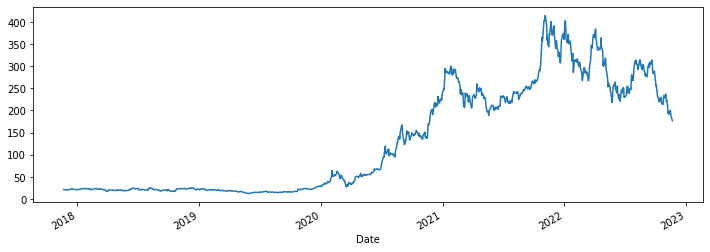

In [9]:
df_tsla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

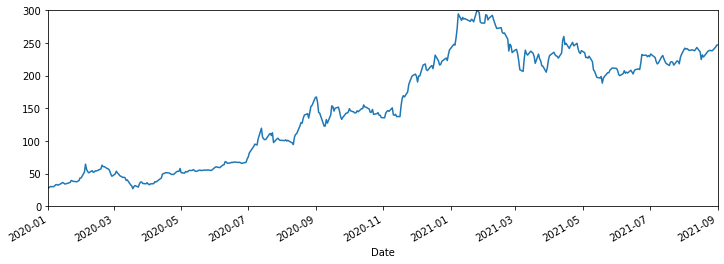

In [15]:
df_tsla['High'].plot(xlim=['2020-01-01','2021-09-01'], ylim=[0,300], figsize=(12,4))

<AxesSubplot:xlabel='Date'>

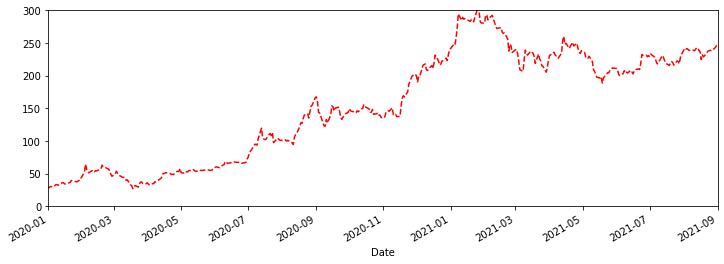

In [17]:
df_tsla['High'].plot(xlim=['2020-01-01','2021-09-01'], ylim=[0,300], figsize=(12,4), ls='--', c='red')

In [21]:
index = df_tsla.loc['2020-01-01':'2021-09-01'].index
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [19]:
share_open = df_tsla.loc['2020-01-01':'2021-09-01']['Open']
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

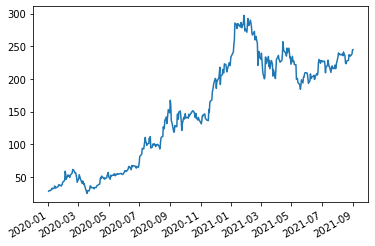

In [23]:
figure, axis = plt.subplots()
figure.autofmt_xdate()
axis.plot(index, share_open)

In [25]:
df_tsla = df_tsla.reset_index()
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB
